In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.manifold import TSNE

In [4]:
DATASET_DIR = "../dataset/classification/voting"
SAVE_NAME = "voting_original.csv"

In [5]:
df = pd.read_csv(f"{DATASET_DIR}/{SAVE_NAME}")
df

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,republican,n,n,y,y,y,y,n,n,y,y,n,y,y,y,n,y
431,democrat,n,n,y,n,n,n,y,y,y,y,n,n,n,n,n,y
432,republican,n,?,n,y,y,y,n,n,n,n,y,y,y,y,n,y
433,republican,n,n,n,y,y,y,?,?,?,?,n,y,y,y,n,y


In [10]:
for col in df.columns:
    print(df[col].value_counts())

democrat      267
republican    168
Name: Class Name, dtype: int64
n    236
y    187
?     12
Name: handicapped-infants, dtype: int64
y    195
n    192
?     48
Name: water-project-cost-sharing, dtype: int64
y    253
n    171
?     11
Name: adoption-of-the-budget-resolution, dtype: int64
n    247
y    177
?     11
Name: physician-fee-freeze, dtype: int64
y    212
n    208
?     15
Name: el-salvador-aid, dtype: int64
y    272
n    152
?     11
Name: religious-groups-in-schools, dtype: int64
y    239
n    182
?     14
Name: anti-satellite-test-ban, dtype: int64
y    242
n    178
?     15
Name: aid-to-nicaraguan-contras, dtype: int64
y    207
n    206
?     22
Name: mx-missile, dtype: int64
y    216
n    212
?      7
Name: immigration, dtype: int64
n    264
y    150
?     21
Name: synfuels-corporation-cutback, dtype: int64
n    233
y    171
?     31
Name: education-spending, dtype: int64
y    209
n    201
?     25
Name: superfund-right-to-sue, dtype: int64
y    248
n    170
?     17
Name:

In [8]:
pd.crosstab(df["y"],df["contact"])

contact,cellular,telephone
y,,
no,22291,14257
yes,3853,787


In [9]:
pd.crosstab(df["y"],df["poutcome"])

poutcome,failure,nonexistent,success
y,,,
no,3647,32422,479
yes,605,3141,894


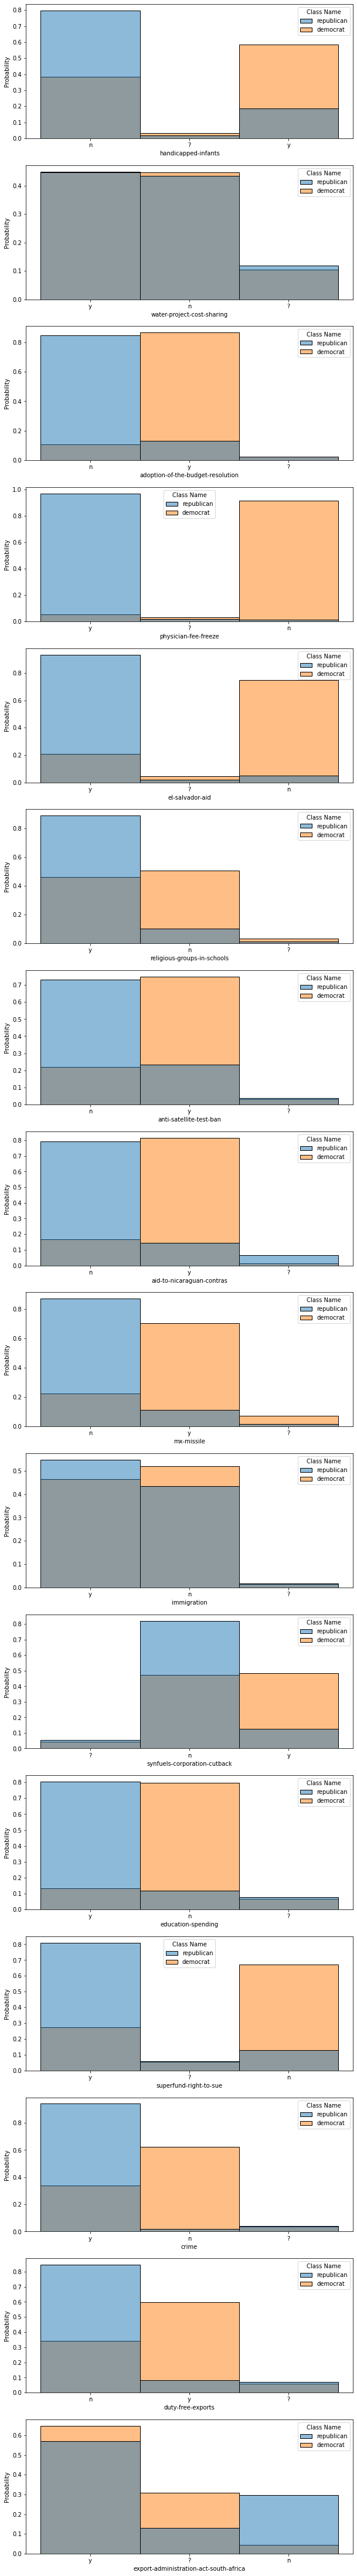

In [13]:
fig, ax = plt.subplots(len(df.columns[1:]),1, figsize=(10,80))
for i, col in enumerate(df.columns[1:]):
    g = sns.histplot(x=col, hue="Class Name", stat="probability", common_norm=False, data=df, ax=ax[i], )

# t-sne

In [14]:
features_ori = df.drop(columns=["Class Name","physician-fee-freeze"])

onehot = OneHotEncoder(sparse=False)
features = onehot.fit_transform(features_ori)
features.shape

(435, 45)

In [15]:
flag = (df["physician-fee-freeze"]=="y").values
features[flag].shape

(177, 45)

In [16]:
tsne = TSNE(random_state=0)
features_embedd = tsne.fit_transform(features)

In [17]:
df_embedd = pd.DataFrame(features_embedd, columns=["embedd_x","embedd_y"])
df_embedd["physician-fee-freeze"] = df["physician-fee-freeze"]
df_embedd["Class Name"] = df["Class Name"]

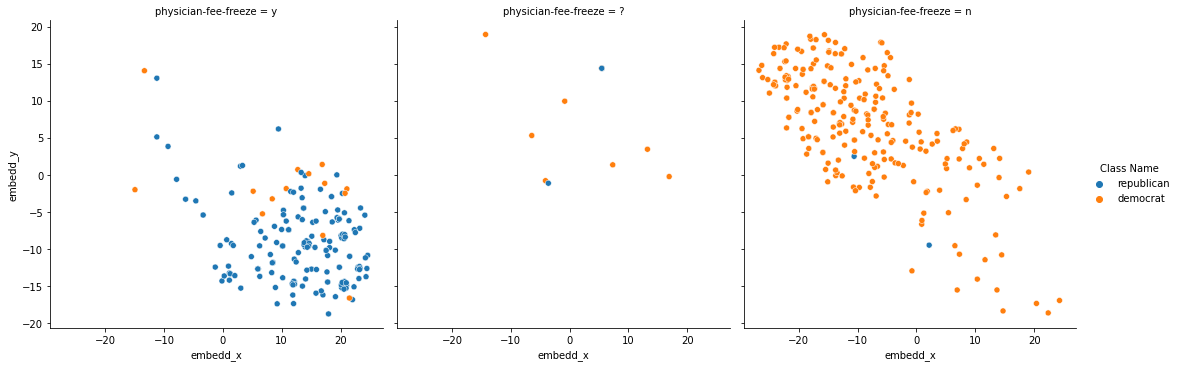

In [18]:
sns.relplot(x="embedd_x", y="embedd_y", col="physician-fee-freeze", hue="Class Name", data=df_embedd)